In [1]:
import soli
soli.__version__

'0.1.0'

In [2]:
import numpy as np
import pandas as pd
import stackview
from skimage.io import imsave
from skimage.data import cells3d
from skimage.measure import label
import matplotlib.pyplot as plt


In [3]:
# draw a sphere into a 3D binary image
sphere_image = np.zeros((100, 100, 100), dtype=np.uint8)
center = np.array(sphere_image.shape) // 2
Z, Y, X = np.ogrid[:100, :100, :100]
sphere = (X - center[2])**2 + (Y - center[1])**2 + (Z - center[0])**2 <= 40**2
sphere_image[sphere] = 1

stackview.slice(sphere_image)

StackViewNDArray([[[0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   ...,
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0]],

                  [[0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   ...,
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0]],

                  [[0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   ...,
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0]],

                  ...,

                  [[0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   ...,
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0]],

                  [[0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   ...,
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0]],

                  [[0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   ...,
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)
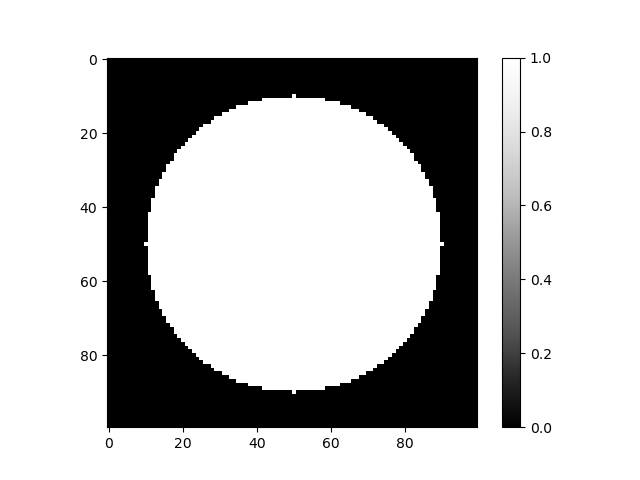
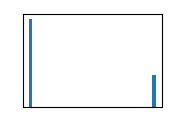

In [4]:
stackview.insight(sphere_image)

In [5]:
imsave("sphere.tif", sphere_image)

C:\Users\haase\AppData\Local\Temp\ipykernel_20468\2543684351.py:1: UserWarning: sphere.tif is a low contrast image
  imsave("sphere.tif", sphere_image)


In [6]:
sphere_stats = soli.measure(sphere_image)
sphere_stats

,label,surface_area,volume,convex_hull_area,convex_hull_volume,solidity,sphericity_wadell,sphericity_legland
0,1,21850.543717,267677.166667,20401.538418,273325.166667,0.979336,0.919241,0.776763


In [7]:
cube = np.zeros((10,10,10))
cube[1:9,1:9,1:9] = 1
soli.measure(cube)

,label,surface_area,volume,convex_hull_area,convex_hull_volume,solidity,sphericity_wadell,sphericity_legland
0,1.0,355.12902,500.666667,355.12902,500.666667,1.0,0.858612,0.632982


StackViewNDArray([[[5311, 5880, 4363, ..., 6449, 5406, 6497],
                   [3414, 4363, 4126, ..., 6923, 5453, 6117],
                   [4505, 5833, 4837, ..., 5121, 4268, 6591],
                   ...,
                   [3888, 4932, 3841, ..., 5928, 4552, 5216],
                   [4031, 3367, 3746, ..., 5311, 5785, 6971],
                   [3604, 4600, 4410, ..., 5880, 5880, 5690]],

                  [[4220, 5074, 3604, ..., 6544, 6354, 6117],
                   [4695, 4695, 3888, ..., 5406, 4884, 5785],
                   [4173, 6259, 3841, ..., 5596, 5501, 5406],
                   ...,
                   [3557, 3272, 5074, ..., 5074, 4458, 4837],
                   [2656, 3319, 3082, ..., 3983, 5359, 5169],
                   [4173, 2798, 4363, ..., 4220, 4742, 4600]],

                  [[4552, 4742, 4742, ..., 5833, 6022, 4979],
                   [3509, 4647, 3509, ..., 5264, 3746, 4220],
                   [4600, 3888, 4742, ..., 4600, 5501, 7398],
                   ...,
                   [3746, 1612, 3746, ..., 5453, 5311, 4173],
                   [3841, 3462, 3367, ..., 4884, 4742, 3035],
                   [3604, 2798, 3082, ..., 5690, 5833, 6117]],

                  ...,

                  [[5121, 5738, 5169, ..., 6497, 5406, 3983],
                   [6544, 5264, 6449, ..., 5264, 4932, 5406],
                   [7208, 5216, 5548, ..., 3130, 4552, 3794],
                   ...,
                   [2656, 4078, 3319, ..., 3746, 3699, 3319],
                   [3557, 4363, 4505, ..., 3462, 4031, 2656],
                   [3225, 2513, 2608, ..., 2513, 4647, 3035]],

                  [[5359, 5738, 6402, ..., 4126, 5785, 4505],
                   [6497, 4932, 5501, ..., 5833, 5596, 5359],
                   [4315, 4742, 5027, ..., 5359, 3509, 4173],
                   ...,
                   [4031, 2893, 3888, ..., 4979, 4458, 2656],
                   [3651, 4031, 3177, ..., 4742, 4031, 3936],
                   [4031, 5216, 4742, ..., 3651, 4126, 3604]],

                  [[6402, 4789, 5928, ..., 6402, 5596, 6022],
                   [4979, 4742, 6402, ..., 5074, 5027, 4837],
                   [5453, 5264, 5121, ..., 4932, 4315, 5501],
                   ...,
                   [5453, 3604, 1992, ..., 4600, 3794, 4837],
                   [2750, 3082, 4410, ..., 3936, 3983, 4031],
                   [3936, 4315, 3414, ..., 3983, 3604, 4031]]],
                 dtype=uint16)
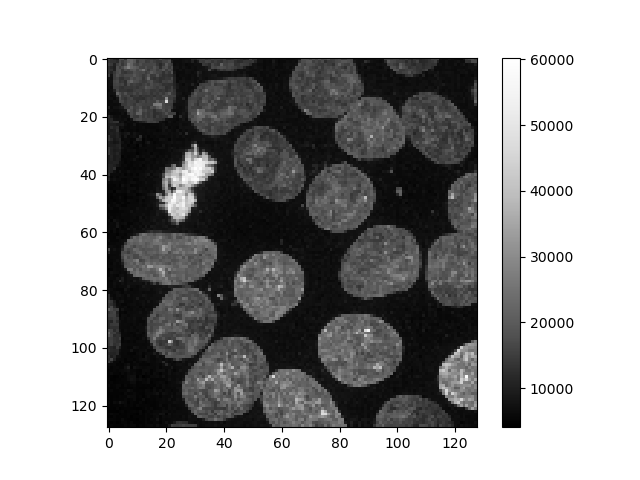
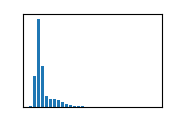

In [8]:
nuclei = cells3d()[:,1,::2,::2]
stackview.insight(nuclei)

StackViewNDArray([[[0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   ...,
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0]],

                  [[0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   ...,
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0]],

                  [[0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   ...,
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0]],

                  ...,

                  [[0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   ...,
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0]],

                  [[0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   ...,
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0]],

                  [[0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   ...,
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0],
                   [0, 0, 0, ..., 0, 0, 0]]])
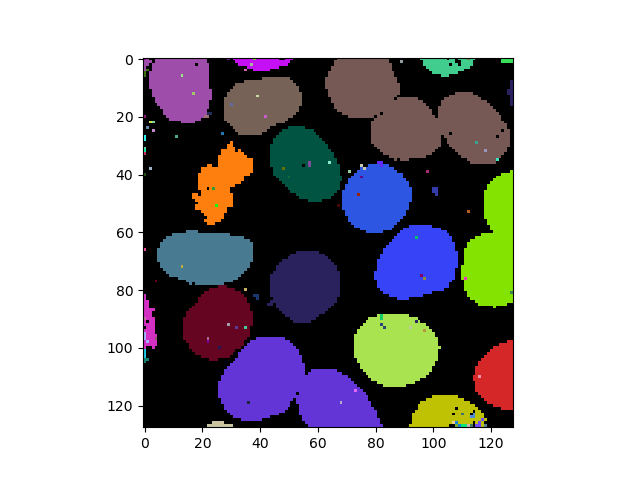

In [9]:
labels = label(nuclei > 12000)
stackview.insight(labels)

In [10]:
imsave("labels.tif", labels)

C:\Users\haase\AppData\Local\Temp\ipykernel_20468\897645804.py:1: UserWarning: labels.tif is a low contrast image
  imsave("labels.tif", labels)


In [11]:
nuclei_stats = soli.measure(labels)
nuclei_stats

,label,surface_area,volume,convex_hull_area,convex_hull_volume,solidity,sphericity_wadell,sphericity_legland
0,1,1.732051,0.166667,1.732051,0.166667,1.000000,0.845583,0.604600
1,2,3873.657956,6240.041667,2890.951834,11065.000000,0.563944,0.423144,0.075764
2,3,4.560478,0.666667,4.560478,0.666667,1.000000,0.809244,0.529955
3,4,2048.025588,4543.708333,1690.684896,5107.083333,0.889688,0.647772,0.271811
4,5,12603.822126,17302.416667,5145.230281,28497.958333,0.607146,0.256677,0.016911
...,...,...,...,...,...,...,...,...
108,109,1.732051,0.166667,1.366025,0.083333,2.000000,0.845583,0.604600
109,110,4.560478,0.666667,4.560478,0.666667,1.000000,0.809244,0.529955
110,111,7.292529,1.416667,7.292529,1.416667,1.000000,0.836471,0.585266
111,112,1.732051,0.166667,1.732051,0.166667,1.000000,0.845583,0.604600


In [12]:
stats_morpholibj = pd.read_csv("labels_mopholibj.csv")
stats_morpholibj

,Label,Volume,SurfaceArea,MeanBreadth,Sphericity,EulerNumber,Box.X.Min,Box.X.Max,Box.Y.Min,Box.Y.Max,...,Elli.Azim,Elli.Elev,Elli.Roll,Elli.R1/R2,Elli.R1/R3,Elli.R2/R3,InscrBall.Center.X,InscrBall.Center.Y,InscrBall.Center.Z,InscrBall.Radius
0,1,1,3.004,0.751,4.172,1,27,28,26,27,...,0.000,0.000,0.000,1.000,1.000,1.000,27,26,0,1.000
1,2,6292,3484.046,24.692,0.106,-3,17,38,29,58,...,63.476,85.096,34.821,1.623,3.822,2.355,30,37,39,4.333
2,3,2,5.642,1.214,2.519,1,24,25,45,46,...,0.000,-90.000,90.000,2.000,2.000,1.000,24,45,17,1.000
3,4,4543,1861.327,-16.534,0.362,3,114,128,98,122,...,-82.643,73.273,-87.144,1.230,1.931,1.569,127,103,37,5.333
4,5,17216,10787.182,-410.896,0.027,-198,26,83,97,128,...,17.255,1.573,95.611,2.223,2.413,1.086,40,108,24,4.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,109,1,3.004,0.751,4.172,1,30,31,16,17,...,0.000,0.000,0.000,1.000,1.000,1.000,30,16,52,1.000
109,110,2,5.642,1.214,2.519,1,13,14,72,73,...,0.000,-90.000,90.000,2.000,2.000,1.000,13,72,52,1.000
110,111,3,8.071,1.544,1.936,1,22,24,19,20,...,0.000,45.000,-90.000,1.464,2.236,1.528,23,19,53,1.000
111,112,1,3.004,0.751,4.172,1,29,30,0,1,...,0.000,0.000,0.000,1.000,1.000,1.000,29,0,54,1.000


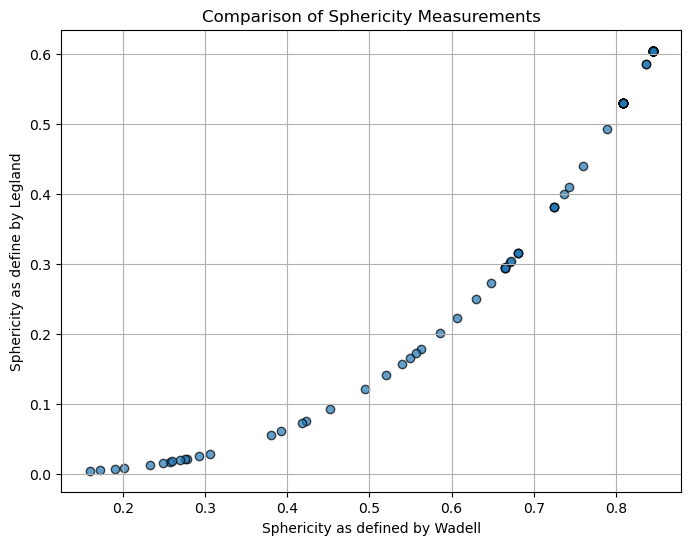

In [13]:
# Extract sphericity values
sphericity_wadell = nuclei_stats["sphericity_wadell"]
sphericity_legland = nuclei_stats["sphericity_legland"]

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(sphericity_wadell, sphericity_legland, alpha=0.7, edgecolors='k')
plt.title('Comparison of Sphericity Measurements')
plt.xlabel('Sphericity as defined by Wadell')
plt.ylabel('Sphericity as define by Legland')
plt.grid(True)
plt.show()

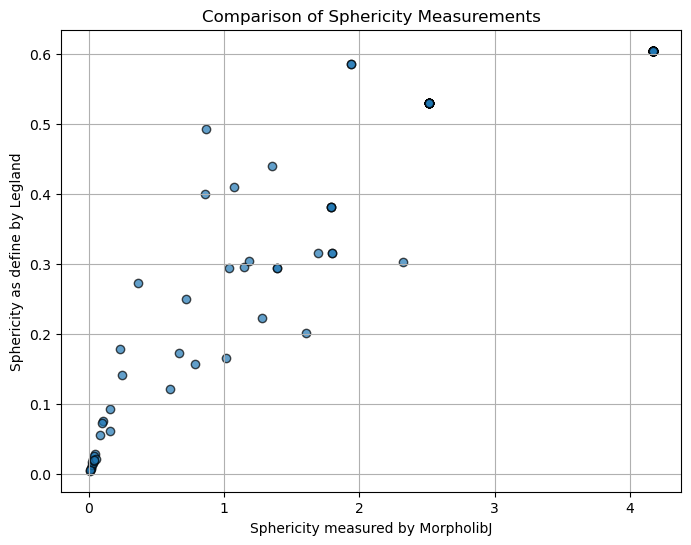

In [14]:
# Extract sphericity values
sphericity_morpholibj = stats_morpholibj["Sphericity"]
sphericity_legland = nuclei_stats["sphericity_legland"]

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(sphericity_morpholibj, sphericity_legland, alpha=0.7, edgecolors='k')
plt.title('Comparison of Sphericity Measurements')
plt.xlabel('Sphericity measured by MorpholibJ')
plt.ylabel('Sphericity as define by Legland')
plt.grid(True)
plt.show()